In [306]:
import numpy as np
import control.matlab as c
import matplotlib.pyplot as plt
I=4
leverArm=0.1 #cp-cg, center of pressure-center of gravity
CNa=37*np.pi/180
#aerodynamic plant+control in a system of form xdot=Ax+Bu, where
#x represents the state
density=1
v=150; #roughly half the speed of sound, this is the freestream air speed
A=0.25*np.pi*(6*25.4)**2
#C1=-CNa*leverArm*(0.5*density*v**2)/I
C1=14.6
C2=-CNa*(leverArm**2)*(0.5*density*v)/I
leverArmMotor=0.25
Thrust=92
C3=Thrust*leverArmMotor/I

A=np.array([[0, 0, 1, 0,0,0],
            [0, 0, 0, 1,0,0],
            [C1, 0, C2, 0,C3,0],
            [0,C1, 0, C2,0,C3],
            [0,0, 0, 0,0,0],
            [0,0, 0, 0,0,0]]); 

B=[[0, 0], [0, 0], [0, 0],[0, 0],[0.8, 0],[0, 0.8]]
Q=np.array([[100,0,0,0,0,0],[0,100,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1000,0],[0,0,0,0,0,1000]])
R=100000*np.eye(2)
K, S, E = c.lqr(A, B, Q, R)
C=np.eye(6)
covVe=0.05*np.eye(6)
covVe[5,5]=0.001
covVe[4,4]=0.001
covVe[3,3]=0.01
covVe[2,2]=0.01
covVd=0.05*np.eye(2)
G=0.05*C3*np.array([[1,0],[0,1],[1,0],[0,1],[1,0],[0,1]])
L, P, E =c.lqe(A,G,C,covVd,covVe)
#print(L)
K[0,4]=6.5
K[0,5]=6.5

print(K)

#print(np.matmul(K,L))

[[24.38544134  0.          6.2816405   0.          6.5         6.5       ]
 [ 0.         24.38544133  0.          6.2816405   0.          9.50308277]]


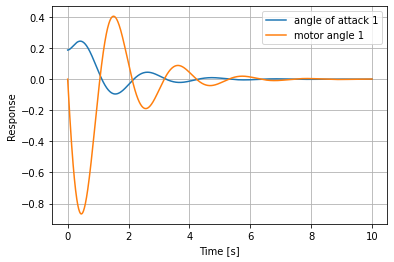

In [307]:
# Define the closed-loop system

sys_cl = c.ss(A - np.matmul(B,K), B, np.eye(6), np.zeros((6, 2)))

# Define the time vector
t = np.linspace(0, 10, 1000)

# Define the initial condition
x0 = [0.1875, 0, 0, 0, 0, 0]

# Compute the step response of the closed-loop system
x,t = c.initial(sys_cl, t, X0=x0)
# Plot the step response
plt.plot(t, x[:,0], label='angle of attack 1')
plt.plot(t,x[:,4],label='motor angle 1')
plt.xlabel('Time [s]')
plt.ylabel('Response')
plt.legend()
plt.grid()
plt.show()

[0.26179939 0.         0.         0.         0.         0.        ]


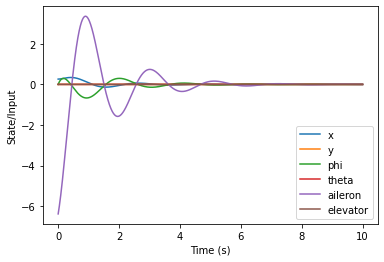

In [308]:
# define the simulation time span
t_span = np.arange(0, 10, 0.001)

# simulate the system using time-stepping
x = np.zeros((6, len(t_span)))
u = np.zeros((2, len(t_span)))
x[:,0] = np.array([np.pi/12, 0, 0, 0, 0, 0])
print(x[:,0])
for i in range(len(t_span) - 1):
    u[:,i] = -np.dot(K, x[:,i].reshape(6, 1)).flatten()
   
    x_dot = np.matmul(A,x[:,i])+np.matmul(B,u[:,i])
    x[:,i+1] = (x[:,i] + x_dot.flatten()*0.001).flatten()

# plot the results
plt.plot(t_span, x[0,:], label='x')
plt.plot(t_span, x[1,:], label='y')
plt.plot(t_span, x[2,:], label='phi')
plt.plot(t_span, x[3,:], label='theta')
plt.plot(t_span, u[0,:], label='aileron')
plt.plot(t_span, u[1,:], label='elevator')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('State/Input')
plt.show()



